# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, period)
s.run()

Retrieve log DataFrames

In [6]:
s.tlog, s.dbal = s.get_logs()
s.stats = s.stats()

In [7]:
s.tlog.tail(100)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total
84,2011-03-10,1295.11,2011-03-24,1309.66,14.55,160.05,11,5496.77
85,2011-04-11,1324.46,2011-04-20,1330.36,5.90,64.90,11,5561.67
86,2011-05-05,1335.10,2011-05-31,1345.20,10.10,111.10,11,5672.77
87,2011-06-01,1314.55,2011-06-21,1295.52,-19.03,-209.33,11,5463.44
88,2011-07-11,1319.49,2011-07-19,1326.73,7.24,79.64,11,5543.08
89,2011-07-27,1304.89,2011-08-15,1204.49,-100.40,-1104.40,11,4438.68
90,2012-01-30,1313.01,2012-02-03,1344.90,31.89,318.90,10,4757.58
91,2012-03-05,1364.33,2012-03-12,1371.09,6.76,67.60,10,4825.18
92,2012-03-22,1392.78,2012-03-26,1416.51,23.73,237.30,10,5062.48
93,2012-04-04,1398.96,2012-04-17,1390.78,-8.18,-81.80,10,4980.68


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2019-07-18,25756.48,25756.48,25756.48,0,25756.48,1
2019-07-19,25756.48,25756.48,25756.48,8,1943.60,0
2019-07-22,25869.28,25756.80,25823.84,8,1943.60,1
2019-07-23,25990.80,25852.08,25987.36,8,1943.60,1
2019-07-24,26100.08,26100.08,26100.08,0,26100.08,2


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                   2000-01-03
end                                                     2019-07-24
beginning_balance                                            10000
ending_balance                                            26100.08
total_net_profit                                          16100.08
gross_profit                                              30229.95
gross_loss                                               -14129.86
profit_factor                                                 2.14
return_on_initial_capital                                   161.00
annual_return_rate                                            5.03
trading_period                           19 years 6 months 21 days
pct_time_in_market                                           28.13
total_num_trades                                               184
num_winning_trades                                             142
num_losing_trades                                             

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

2000-01-03 00:00:00 BUY  6 ^GSPC @ 1455.22
2019-07-24 00:00:00 SELL 6 ^GSPC @ 3019.56


Plot Equity Curves: Strategy vs Benchmark

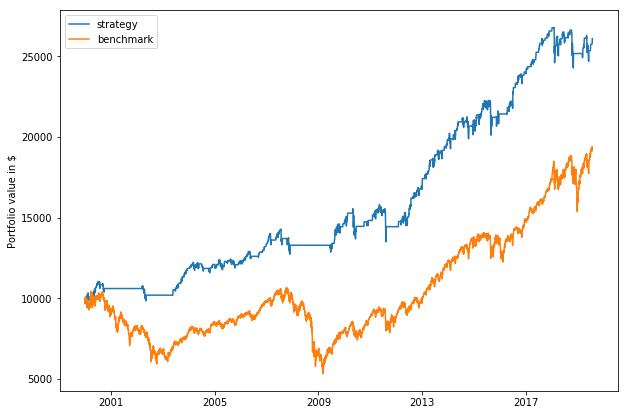

In [11]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

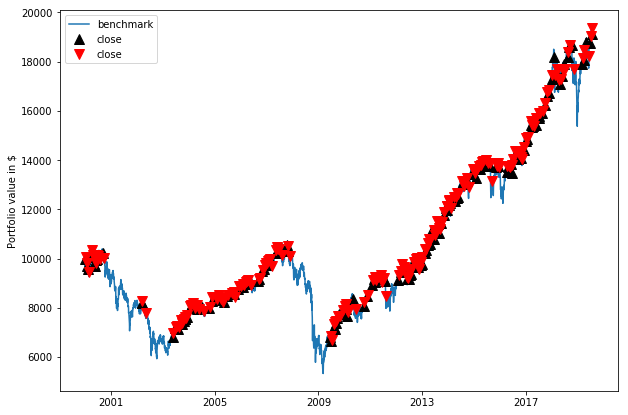

In [12]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,5.03,3.44
max_closed_out_drawdown,-14.56,-50.02
drawdown_annualized_return,-2.90,-14.53
drawdown_recovery,-0.25,-1.42
best_month,10.29,17.90
worst_month,-12.68,-24.09
sharpe_ratio,0.61,0.29
sortino_ratio,0.43,0.38
monthly_std,1.78,3.80


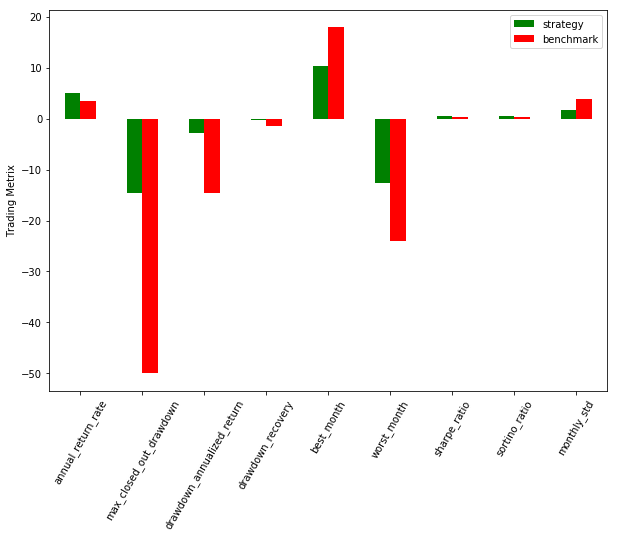

In [13]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(s.stats, benchmark.stats, *metrics)
df